In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
np.random.seed(42)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from pathlib import Path #getting out of comfort zone
import matplotlib.pyplot as plt
import seaborn as sns

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [2]:
PATH_in=Path("/kaggle/input/graduate-admissions")

In [3]:
ver1=Path(PATH_in/"Admission_Predict.csv")
ver2=Path(PATH_in/"Admission_Predict_Ver1.1.csv")

**Loading Data**

In [4]:
Df_2=pd.read_csv(ver2,index_col='Serial No.')
Df_2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
Df_2.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93
499,312,103,4,4.0,5.0,8.43,0,0.73
500,327,113,4,4.5,4.5,9.04,0,0.84


# Starting with the EDA

In [6]:
Df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


hence there is no missing value as all have count=500

Confirming that Rating=5 is highest and Rating=1 is lowest

In [7]:
Df_2.rename(columns={'University Rating':'University_Rating','GRE Score':'GRE_Score',
                     'TOEFL Score':'TOEFL_Score','Chance of Admit':'Chance_of_Admit'},inplace=True) #Chance of admit does not work
Df_2.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
col=Df_2.columns
col #due to the space after t in chance of admit and R in LOR (30mins)

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
Df_2.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'},inplace=True)
Df_2.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
figsize=(15,9)

Text(0, 0.5, 'Chances of Admit')

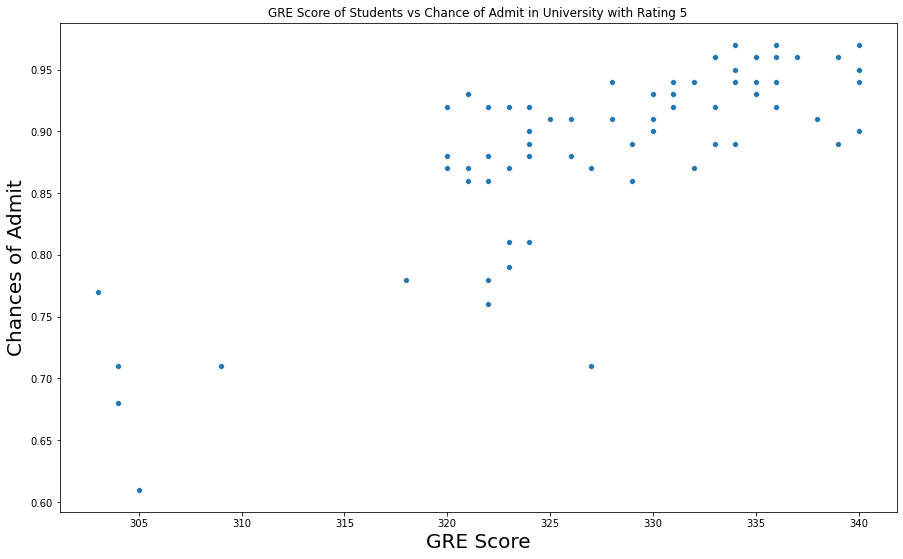

In [11]:
fig,ax=plt.subplots(figsize=figsize)
sns.scatterplot(x=Df_2.loc[Df_2.University_Rating==5]['GRE_Score'],y=Df_2.loc[Df_2.University_Rating==5]['Chance_of_Admit'],ax=ax)
plt.title("GRE Score of Students vs Chance of Admit in University with Rating 5")
plt.xlabel("GRE Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

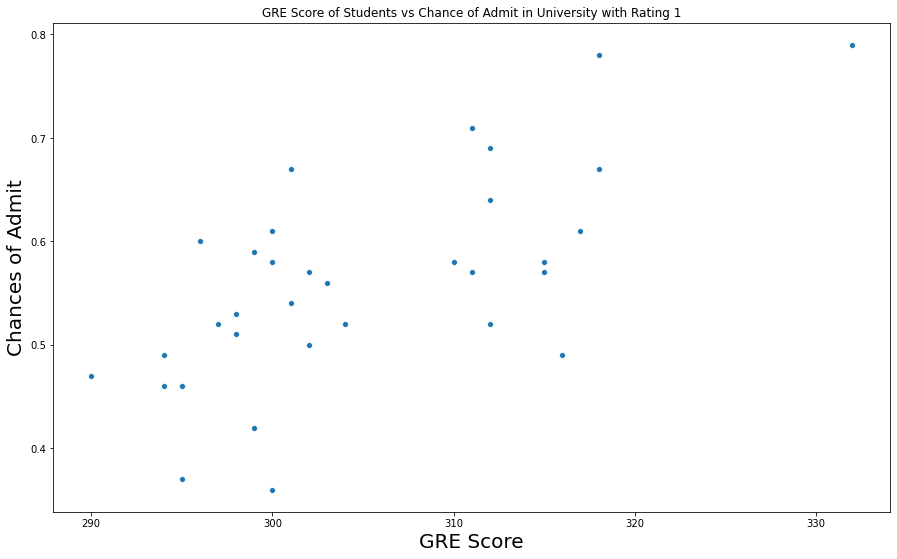

In [12]:
fig,ax=plt.subplots(figsize=figsize)
sns.scatterplot(x=Df_2.loc[Df_2.University_Rating==1]['GRE_Score'],y=Df_2.loc[Df_2.University_Rating==1]['Chance_of_Admit'],ax=ax)
plt.title("GRE Score of Students vs Chance of Admit in University with Rating 1")
plt.xlabel("GRE Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Confirming with CGPA plots

Text(0, 0.5, 'Chances of Admit')

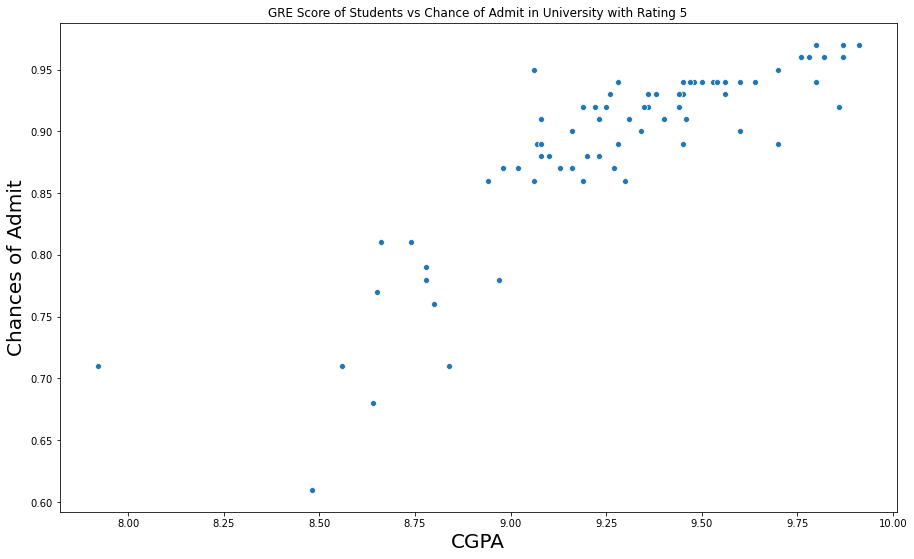

In [13]:
fig,ax=plt.subplots(figsize=figsize)
sns.scatterplot(x=Df_2.loc[Df_2.University_Rating==5]['CGPA'],y=Df_2.loc[Df_2.University_Rating==5]['Chance_of_Admit'],ax=ax)
plt.title("GRE Score of Students vs Chance of Admit in University with Rating 5")
plt.xlabel("CGPA",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

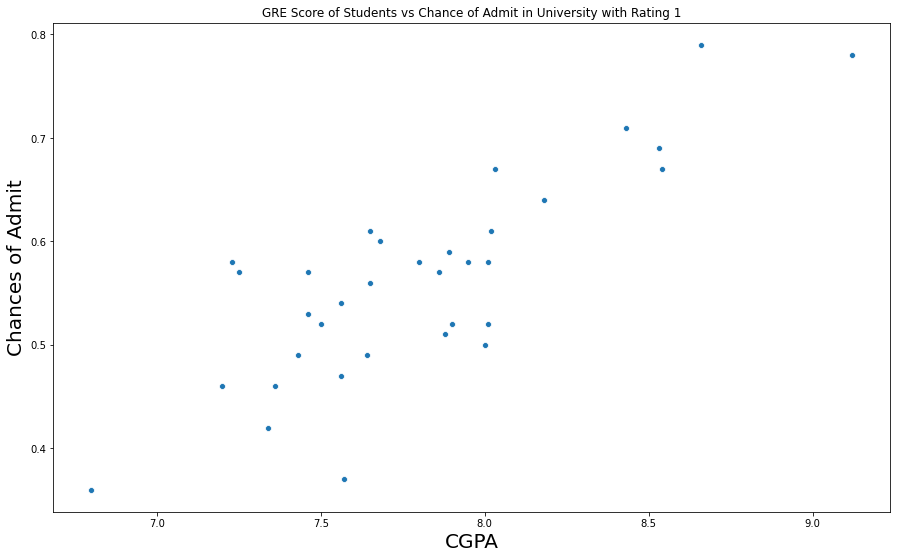

In [14]:
fig,ax=plt.subplots(figsize=figsize)
sns.scatterplot(x=Df_2.loc[Df_2.University_Rating==1]['CGPA'],y=Df_2.loc[Df_2.University_Rating==1]['Chance_of_Admit'],ax=ax)
plt.title("GRE Score of Students vs Chance of Admit in University with Rating 1")
plt.xlabel("CGPA",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

From the looks of it looks like **5=Best score and 1=Least score for a university**

# Continuing 
First we will be keeping target as Chance of Admit irrespective of University Rating and later get back to it

Text(0.5, 0, 'GRE Score')

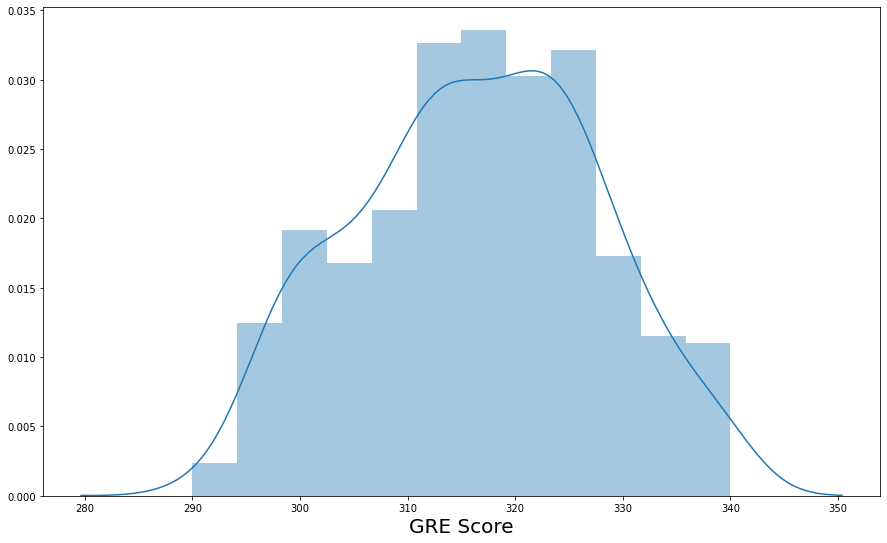

In [15]:
fig,ax=plt.subplots(figsize=figsize)
sns.distplot(Df_2['GRE_Score'],ax=ax)
plt.xlabel("GRE Score",fontsize=20)


Text(0, 0.5, 'Chances of Admit')

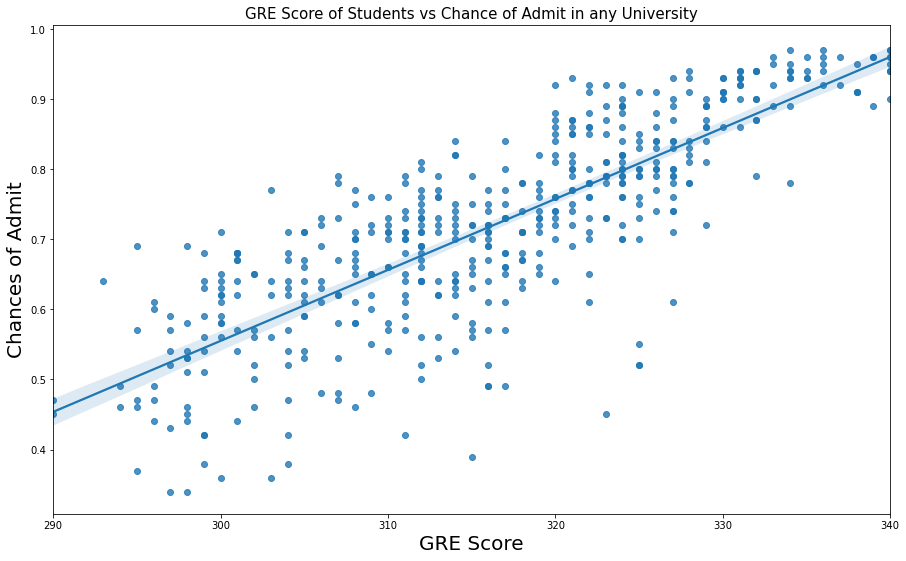

In [16]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2['GRE_Score'],y=Df_2['Chance_of_Admit'],ax=ax)
plt.title("GRE Score of Students vs Chance of Admit in any University",fontsize=15)
plt.xlabel("GRE Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

There is a clear Trend that GRE Score increases your chances of Admit

Text(0, 0.5, 'Chances of Admit')

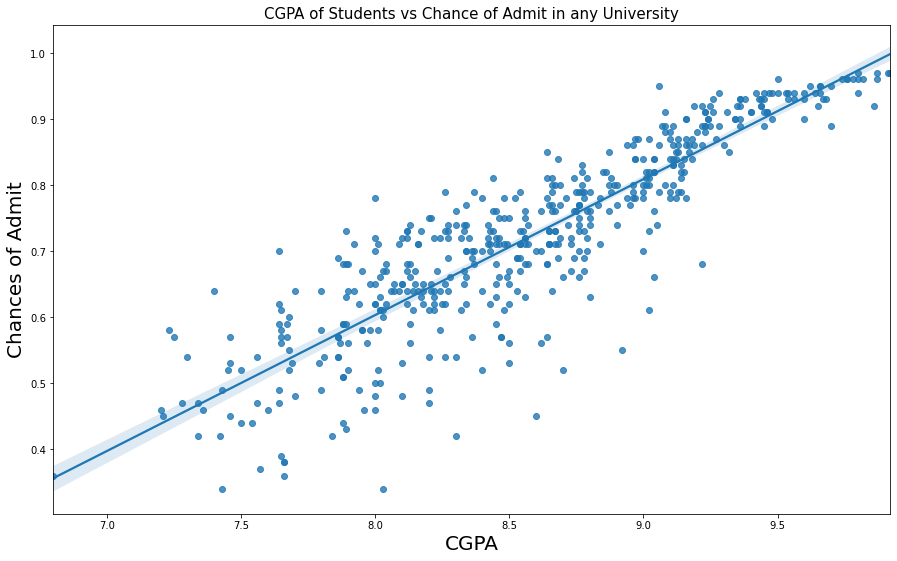

In [17]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2['CGPA'],y=Df_2['Chance_of_Admit'],ax=ax)
plt.title("CGPA of Students vs Chance of Admit in any University",fontsize=15)
plt.xlabel("CGPA",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

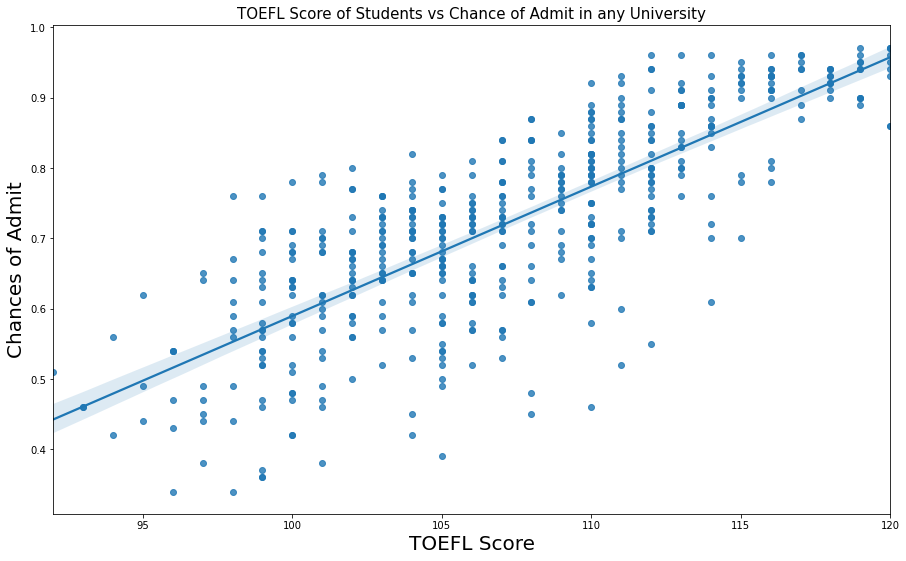

In [18]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2['TOEFL_Score'],y=Df_2['Chance_of_Admit'],ax=ax)
plt.title("TOEFL Score of Students vs Chance of Admit in any University",fontsize=15)
plt.xlabel("TOEFL Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**AGAIN THE TREND SHOWS THAT GOOD MARKS ARE ALWAYS BETTER FOR ADMIT 
CHANCES and CORRELATION ALSO SEEMS TO BE HIGH**

Text(0, 0.5, 'Chances of Admit')

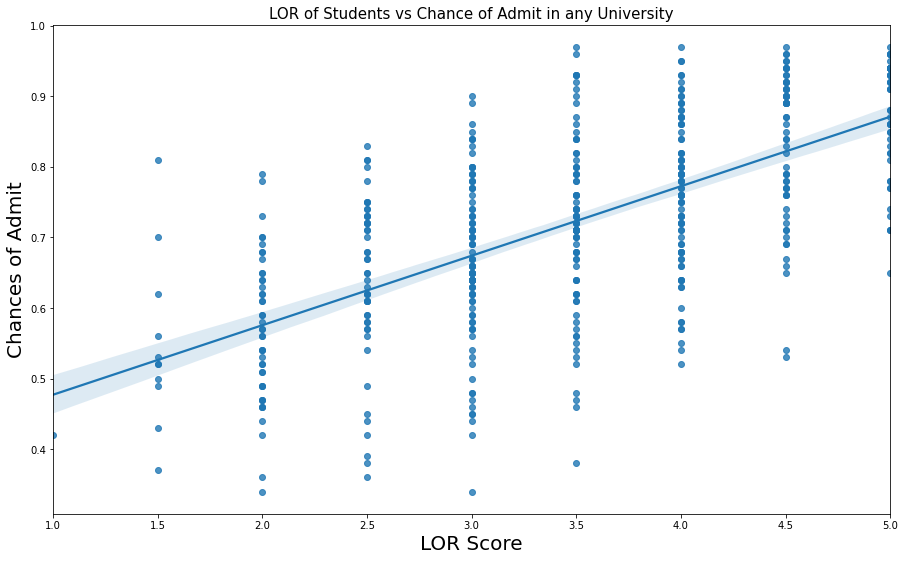

In [19]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2['LOR'],y=Df_2['Chance_of_Admit'],ax=ax)
plt.title("LOR of Students vs Chance of Admit in any University",fontsize=15)
plt.xlabel("LOR Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

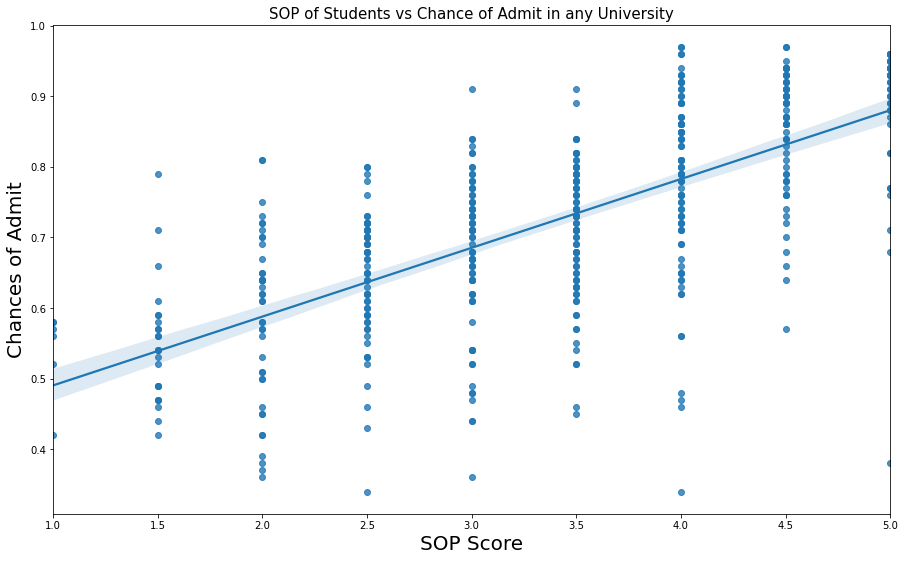

In [20]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2['SOP'],y=Df_2['Chance_of_Admit'],ax=ax)
plt.title("SOP of Students vs Chance of Admit in any University",fontsize=15)
plt.xlabel("SOP Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**Generally speaking, higher scores have a lot better chance of admit than the others.**

Text(0, 0.5, 'Chances of Admit')

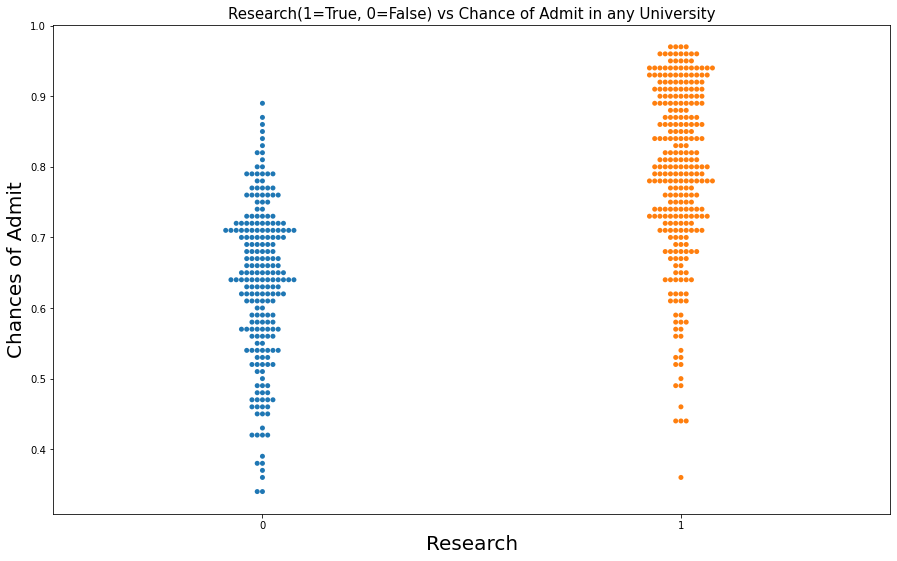

In [21]:
fig,ax=plt.subplots(figsize=figsize)
sns.swarmplot(x=Df_2['Research'],y=Df_2['Chance_of_Admit'],ax=ax)
plt.title("Research(1=True, 0=False) vs Chance of Admit in any University",fontsize=15)
plt.xlabel("Research",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**Max for no research is 90% Chance of Admit. But, having done research does not guarantee Admit at the same time.**

# Combining Results with University Ratings
**Uptill now, we saw the results in isolation and without considering the University Rating. But, as we have established the fact that all the scores have a high positive correlation with Admit chances, we shall now move on to see the influence of University Ratings.**

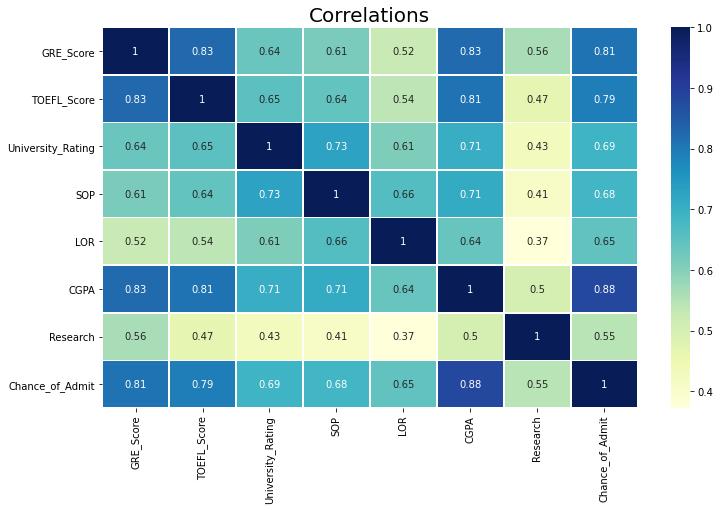

In [22]:
sns.heatmap(Df_2.corr(), annot = True, linewidths=.5, cmap= 'YlGnBu')
plt.title('Correlations', fontsize = 20)
plt.gcf().set_size_inches(12, 7)
plt.show()


Text(0, 0.5, 'Chances of Admit')

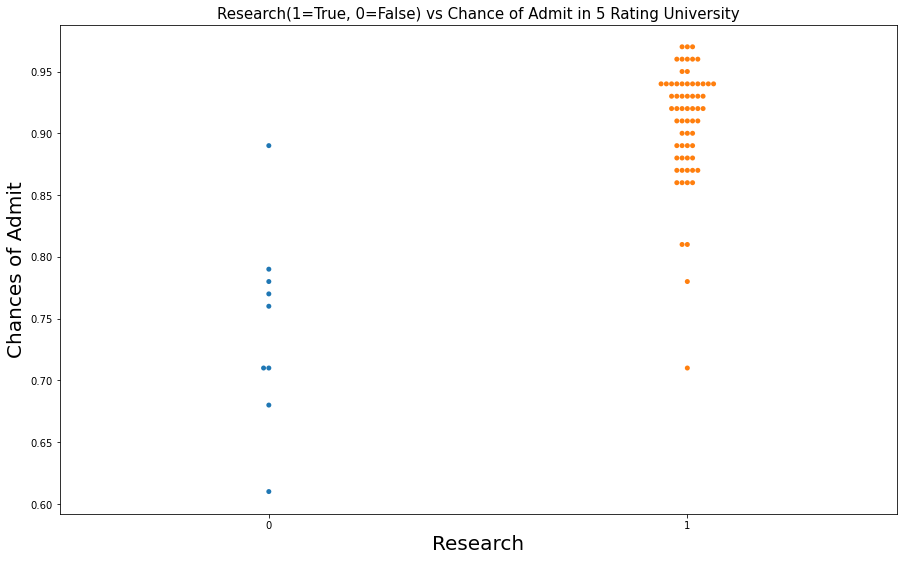

In [23]:
fig,ax=plt.subplots(figsize=figsize)
sns.swarmplot(x=Df_2['Research'],y=Df_2.loc[Df_2.University_Rating==5]['Chance_of_Admit'],ax=ax)
plt.title("Research(1=True, 0=False) vs Chance of Admit in 5 Rating University",fontsize=15)
plt.xlabel("Research",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

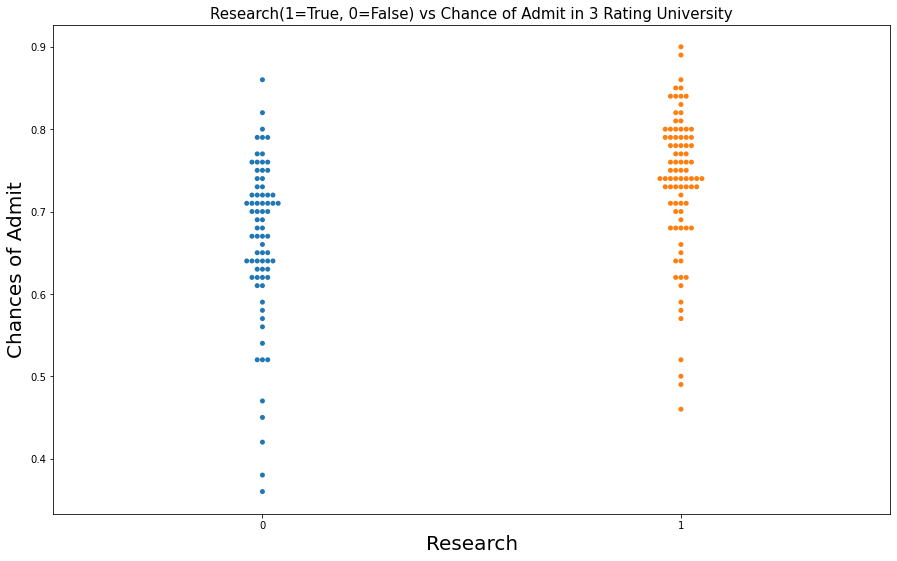

In [24]:
fig,ax=plt.subplots(figsize=figsize)
sns.swarmplot(x=Df_2['Research'],y=Df_2.loc[Df_2.University_Rating==3]['Chance_of_Admit'],ax=ax)
plt.title("Research(1=True, 0=False) vs Chance of Admit in 3 Rating University",fontsize=15)
plt.xlabel("Research",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

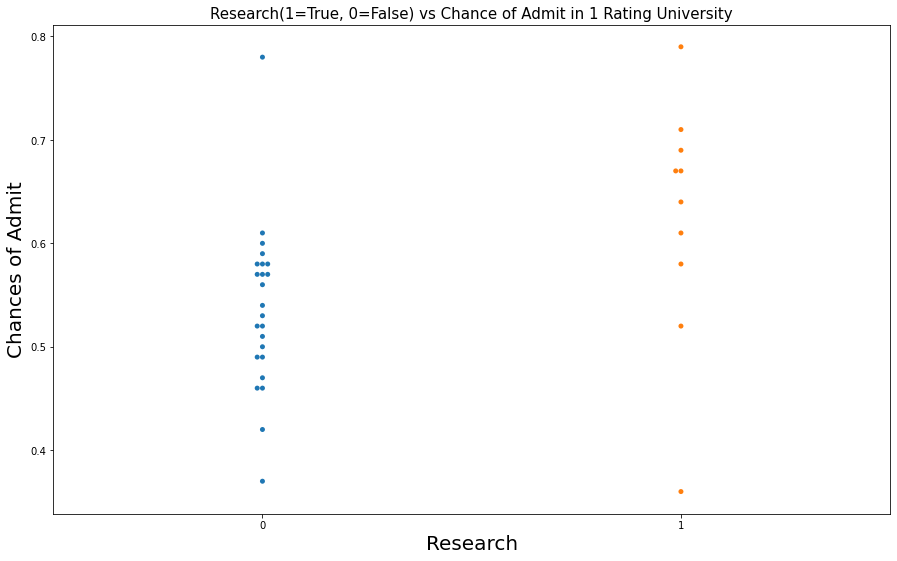

In [25]:
fig,ax=plt.subplots(figsize=figsize)
sns.swarmplot(x=Df_2['Research'],y=Df_2.loc[Df_2.University_Rating==1]['Chance_of_Admit'],ax=ax)
plt.title("Research(1=True, 0=False) vs Chance of Admit in 1 Rating University",fontsize=15)
plt.xlabel("Research",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**It can be clearly seen that for universities with any Rating, doing research is very important and it increases chance of Admit. But for Rating=3(Median), Research does not matter as much as it does for Rating=5 and for Rating=1 we have very few data points to comment on.**

**SOP**

Text(0, 0.5, 'Chances of Admit')

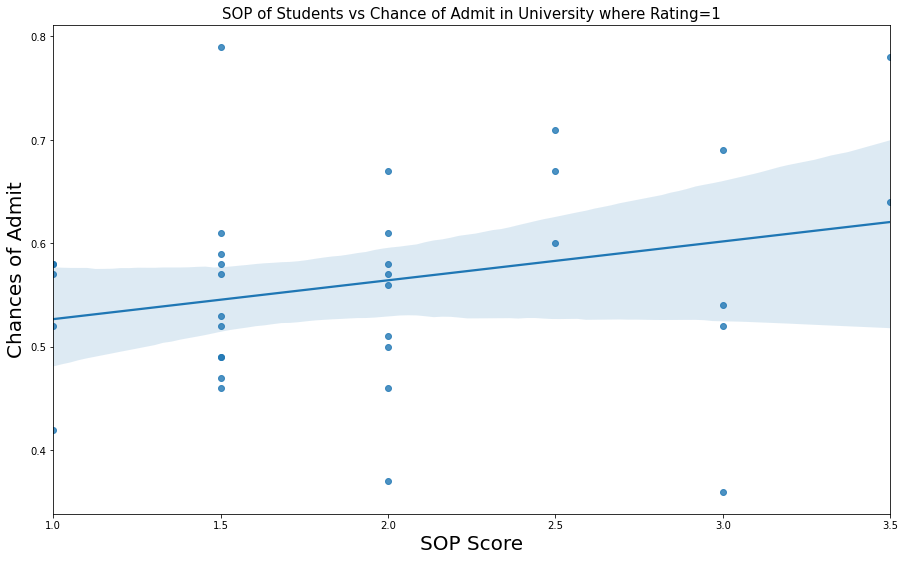

In [26]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==1]['SOP'],y=Df_2.loc[Df_2.University_Rating==1]['Chance_of_Admit'],ax=ax)
plt.title("SOP of Students vs Chance of Admit in University where Rating=1",fontsize=15)
plt.xlabel("SOP Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

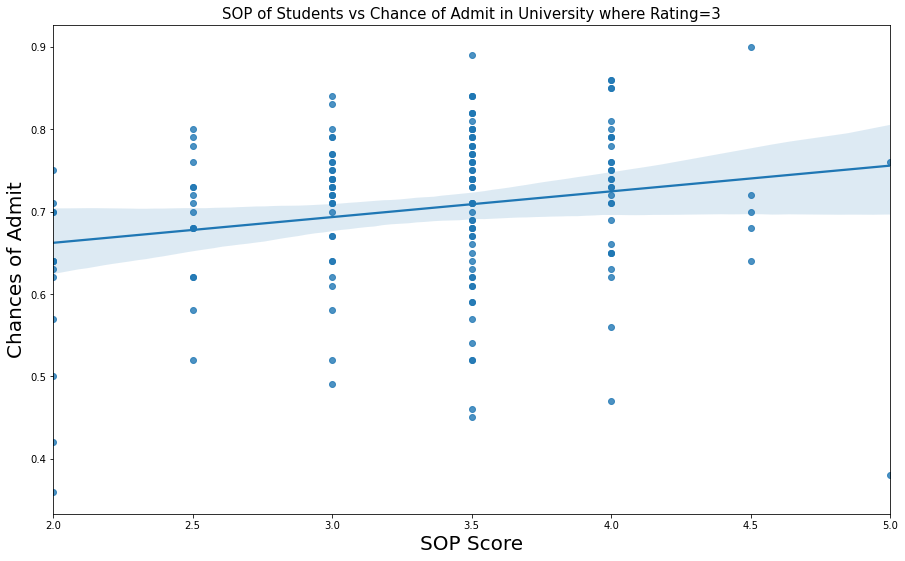

In [27]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==3]['SOP'],y=Df_2.loc[Df_2.University_Rating==3]['Chance_of_Admit'],ax=ax)
plt.title("SOP of Students vs Chance of Admit in University where Rating=3",fontsize=15)
plt.xlabel("SOP Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

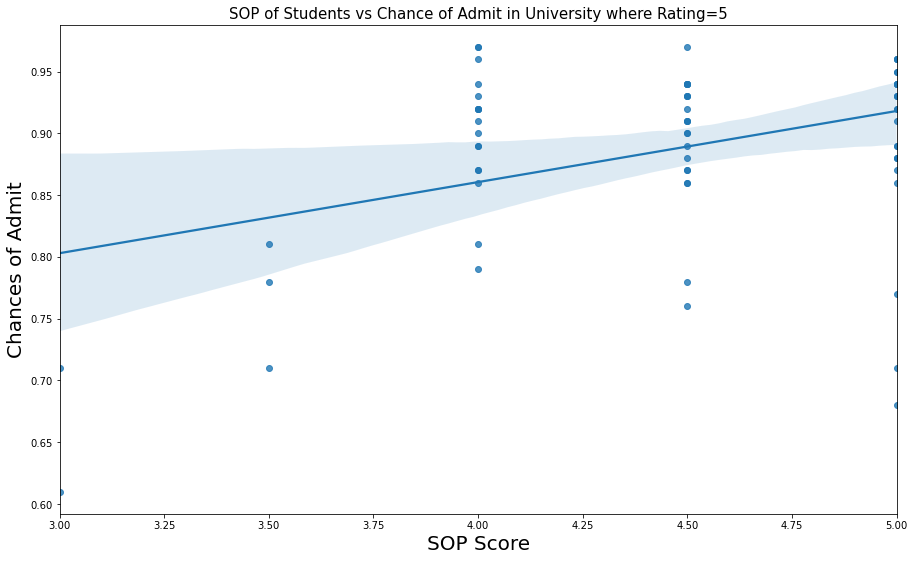

In [28]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==5]['SOP'],y=Df_2.loc[Df_2.University_Rating==5]['Chance_of_Admit'],ax=ax)
plt.title("SOP of Students vs Chance of Admit in University where Rating=5",fontsize=15)
plt.xlabel("SOP Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**LOR**

Text(0, 0.5, 'Chances of Admit')

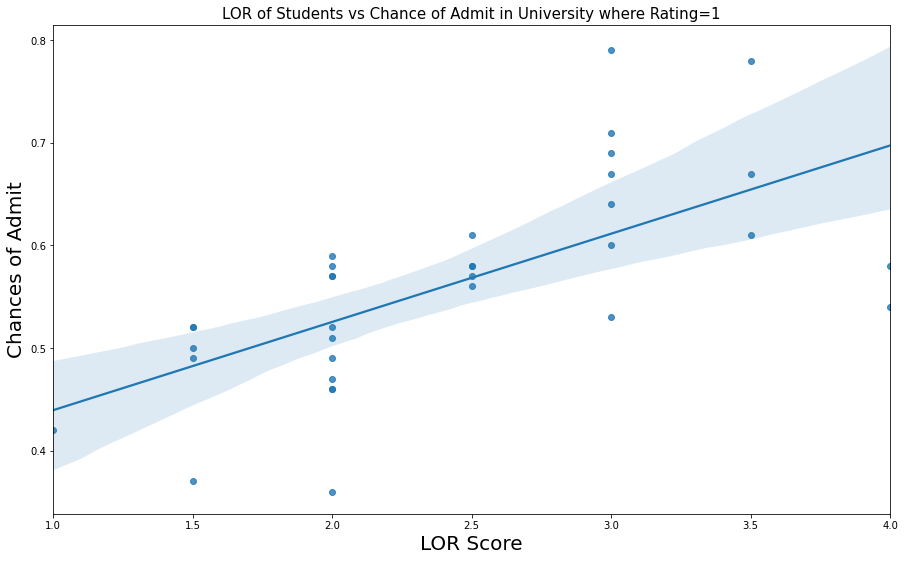

In [29]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==1]['LOR'],y=Df_2.loc[Df_2.University_Rating==1]['Chance_of_Admit'],ax=ax)
plt.title("LOR of Students vs Chance of Admit in University where Rating=1",fontsize=15)
plt.xlabel("LOR Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

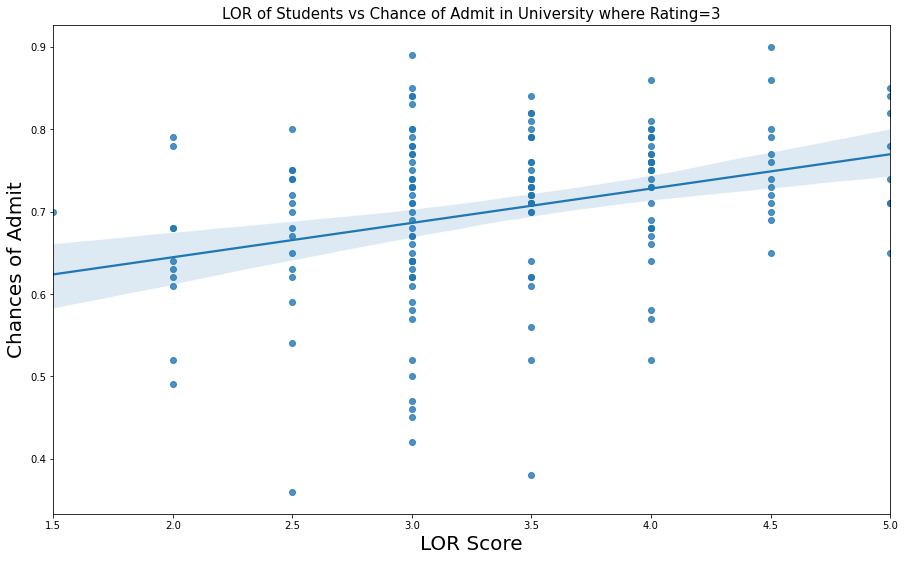

In [30]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==3]['LOR'],y=Df_2.loc[Df_2.University_Rating==3]['Chance_of_Admit'],ax=ax)
plt.title("LOR of Students vs Chance of Admit in University where Rating=3",fontsize=15)
plt.xlabel("LOR Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

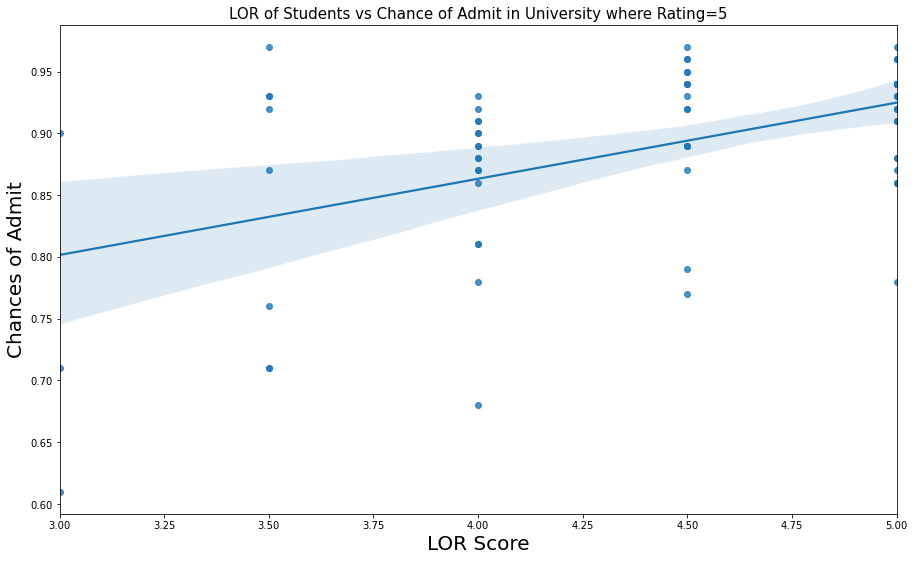

In [31]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==5]['LOR'],y=Df_2.loc[Df_2.University_Rating==5]['Chance_of_Admit'],ax=ax)
plt.title("LOR of Students vs Chance of Admit in University where Rating=5",fontsize=15)
plt.xlabel("LOR Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**CGPA**

Text(0, 0.5, 'Chances of Admit')

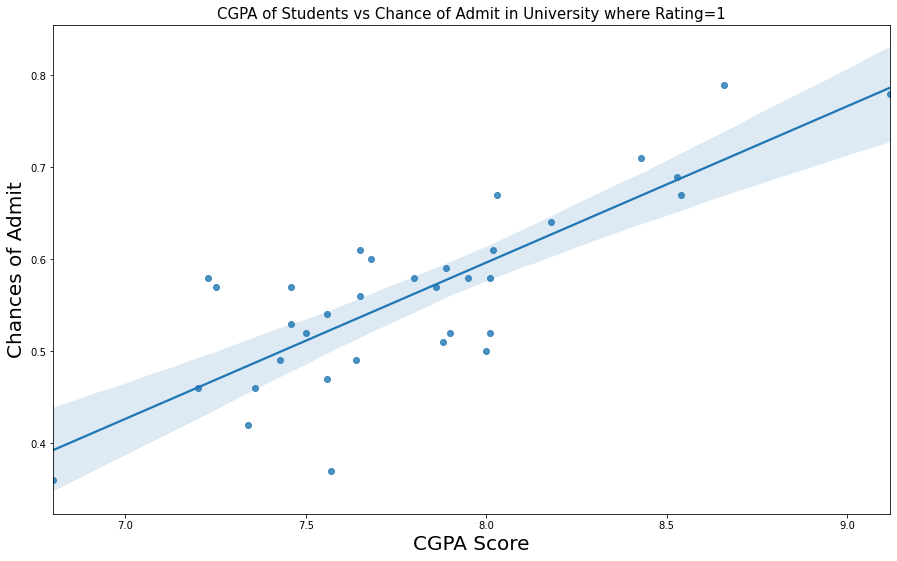

In [32]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==1]['CGPA'],y=Df_2.loc[Df_2.University_Rating==1]['Chance_of_Admit'],ax=ax)
plt.title("CGPA of Students vs Chance of Admit in University where Rating=1",fontsize=15)
plt.xlabel("CGPA Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

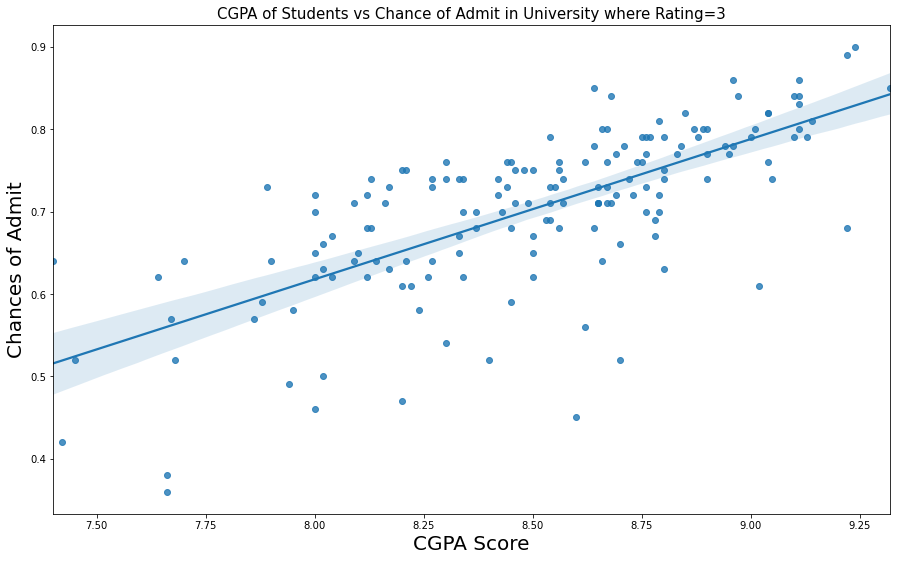

In [33]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==3]['CGPA'],y=Df_2.loc[Df_2.University_Rating==3]['Chance_of_Admit'],ax=ax)
plt.title("CGPA of Students vs Chance of Admit in University where Rating=3",fontsize=15)
plt.xlabel("CGPA Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

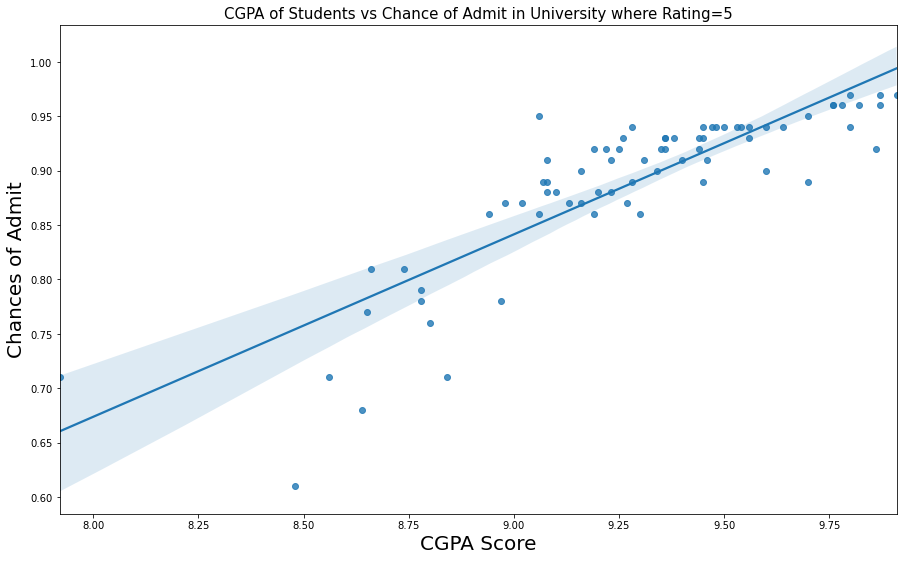

In [34]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==5]['CGPA'],y=Df_2.loc[Df_2.University_Rating==5]['Chance_of_Admit'],ax=ax)
plt.title("CGPA of Students vs Chance of Admit in University where Rating=5",fontsize=15)
plt.xlabel("CGPA Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**TOEFL**

Text(0, 0.5, 'Chances of Admit')

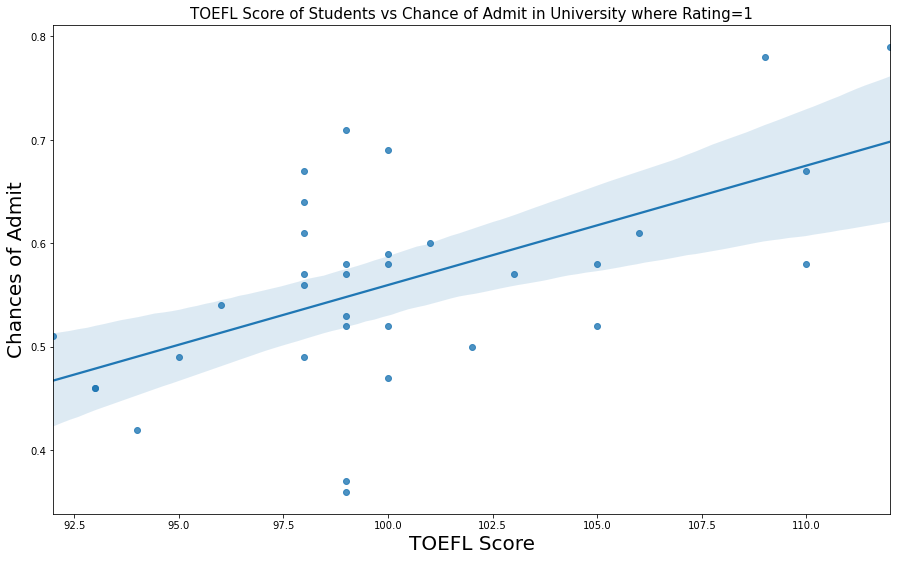

In [35]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==1]['TOEFL_Score'],y=Df_2.loc[Df_2.University_Rating==1]['Chance_of_Admit'],ax=ax)
plt.title("TOEFL Score of Students vs Chance of Admit in University where Rating=1",fontsize=15)
plt.xlabel("TOEFL Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

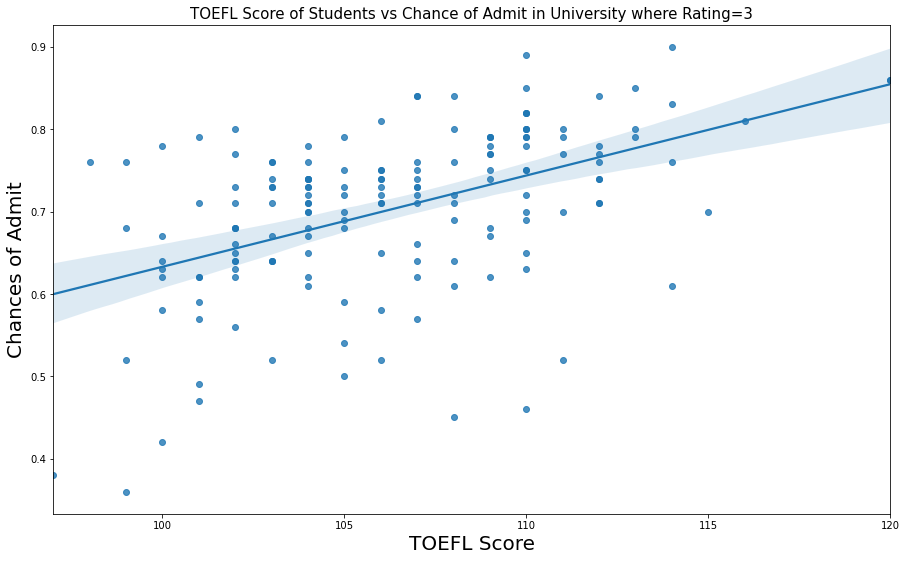

In [36]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==3]['TOEFL_Score'],y=Df_2.loc[Df_2.University_Rating==3]['Chance_of_Admit'],ax=ax)
plt.title("TOEFL Score of Students vs Chance of Admit in University where Rating=3",fontsize=15)
plt.xlabel("TOEFL Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

Text(0, 0.5, 'Chances of Admit')

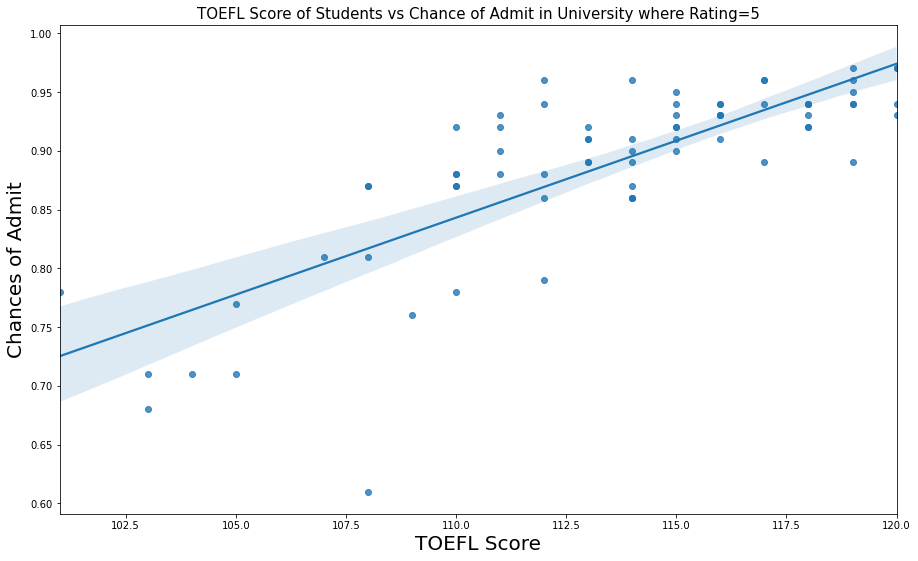

In [37]:
fig,ax=plt.subplots(figsize=figsize)
sns.regplot(x=Df_2.loc[Df_2.University_Rating==5]['TOEFL_Score'],y=Df_2.loc[Df_2.University_Rating==5]['Chance_of_Admit'],ax=ax)
plt.title("TOEFL Score of Students vs Chance of Admit in University where Rating=5",fontsize=15)
plt.xlabel("TOEFL Score",fontsize=20)
plt.ylabel("Chances of Admit",fontsize=20)

**The data shows that for University Rating=5, usually scores are high and chances of admit are also high. For Rating=3(Median), we have varied input ranging from the bottom to the top of the scores and generally there is a positive correlation. While, for rating=1 we have few data points but still there is also a positive correlation.**

# The link to the model development notebook 
https://www.kaggle.com/aakashg1999/model-spm